## Manual prediction VS Simple RNN output-to-output recurrence style
#### fuente: pag. 579 Python ML book

In [1]:
import tensorflow as tf

tf.__version__

'2.0.0'

### Simple RNN with tensorflow keras

In [15]:
import tensorflow as tf

tf.random.set_seed(1)

# https://keras.io/layers/recurrent/
rnn_layer = tf.keras.layers.SimpleRNN(units=2, use_bias=True, return_sequences=True)
rnn_layer.build(input_shape=(None, None, 5))
w_xh, w_oo, b_h = rnn_layer.weights

print('W_xh shape:', w_xh.shape)
print('W_oo shape:', w_oo.shape)

W_xh shape: (5, 2)
W_oo shape: (2, 2)


In [3]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential

model = Sequential()
#>>> model.add(Embedding(input_dim=1000, output_dim=32))
model.add(SimpleRNN(units=6, return_sequences=True))
#>>> model.add(SimpleRNN(32))
model.add(Dense(1))
model.build(input_shape=(None, None, 6))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       multiple                  78        
_________________________________________________________________
dense (Dense)                multiple                  7         
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [7]:
>>> from tensorflow.keras import Sequential
>>> from tensorflow.keras.layers import Embedding
>>> from tensorflow.keras.layers import SimpleRNN
>>> from tensorflow.keras.layers import Dense
>>> model = Sequential()
>>> model.add(Embedding(input_dim=1000, output_dim=32))
>>> model.add(SimpleRNN(32, return_sequences=True))
>>> model.add(SimpleRNN(32))
>>> model.add(Dense(1))
>>> model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 36,193
Trainable params: 36,193
Non-trainable params: 0
_________________________________________________________________


In [16]:
rnn_layer.units

2

In [17]:
rnn_layer.weights

[<tf.Variable 'kernel:0' shape=(5, 2) dtype=float32, numpy=
 array([[-0.6200572 ,  0.7433989 ],
        [ 0.242517  , -0.12119704],
        [-0.38525409,  0.2638626 ],
        [ 0.8809836 , -0.12017238],
        [ 0.2964511 ,  0.19422936]], dtype=float32)>,
 <tf.Variable 'recurrent_kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[ 0.98796964,  0.15464693],
        [-0.15464693,  0.9879698 ]], dtype=float32)>,
 <tf.Variable 'bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

In [18]:
w_xh

<tf.Variable 'kernel:0' shape=(5, 2) dtype=float32, numpy=
array([[-0.6200572 ,  0.7433989 ],
       [ 0.242517  , -0.12119704],
       [-0.38525409,  0.2638626 ],
       [ 0.8809836 , -0.12017238],
       [ 0.2964511 ,  0.19422936]], dtype=float32)>

## Entrenamiento ejemplo

In [44]:
from numpy import array, hstack

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185, 195, 205])

out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
dataset

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185],
       [100, 105, 205],
       [110, 115, 225],
       [120, 125, 245],
       [130, 135, 265],
       [140, 145, 285],
       [150, 155, 305],
       [160, 165, 325],
       [170, 175, 345],
       [180, 185, 365],
       [190, 195, 385],
       [200, 205, 405]])

In [45]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print('training X: {}'.format(X[:3]))
print('training y: {}'.format(y[:3]))

training X: [[[10 15]
  [20 25]
  [30 35]]

 [[20 25]
  [30 35]
  [40 45]]

 [[30 35]
  [40 45]
  [50 55]]]
training y: [ 65  85 105]


In [46]:
# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))
X

array([[ 10,  15,  20,  25,  30,  35],
       [ 20,  25,  30,  35,  40,  45],
       [ 30,  35,  40,  45,  50,  55],
       [ 40,  45,  50,  55,  60,  65],
       [ 50,  55,  60,  65,  70,  75],
       [ 60,  65,  70,  75,  80,  85],
       [ 70,  75,  80,  85,  90,  95],
       [ 80,  85,  90,  95, 100, 105],
       [ 90,  95, 100, 105, 110, 115],
       [100, 105, 110, 115, 120, 125],
       [110, 115, 120, 125, 130, 135],
       [120, 125, 130, 135, 140, 145],
       [130, 135, 140, 145, 150, 155],
       [140, 145, 150, 155, 160, 165],
       [150, 155, 160, 165, 170, 175],
       [160, 165, 170, 175, 180, 185],
       [170, 175, 180, 185, 190, 195],
       [180, 185, 190, 195, 200, 205]])

In [47]:
############
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
############

# define model
model = Sequential()
model.add(rnn_layer)

model.compile(optimizer='adam', loss='mse')

In [48]:
X[:5]

array([[10, 15, 20, 25, 30, 35],
       [20, 25, 30, 35, 40, 45],
       [30, 35, 40, 45, 50, 55],
       [40, 45, 50, 55, 60, 65],
       [50, 55, 60, 65, 70, 75]])

### Para visualizar la red con plot_model o con model_to_dot

In [6]:
>>> from tensorflow.keras import Sequential
>>> from tensorflow.keras.layers import Embedding
>>> from tensorflow.keras.layers import SimpleRNN
>>> from tensorflow.keras.layers import Dense

>>> model = Sequential()
>>> model.add(Embedding(input_dim=1000, output_dim=32))
>>> model.add(SimpleRNN(32, return_sequences=True))
>>> model.add(SimpleRNN(32))
>>> model.add(Dense(1))
model.build()
>>> model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 36,193
Trainable params: 36,193
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.get_weights()[0]

array([[ 0.00057121,  0.04447179, -0.02791776, ...,  0.02469783,
         0.00666325,  0.03649095],
       [ 0.02756082, -0.03304199,  0.02174928, ...,  0.01371039,
         0.04897871,  0.04140252],
       [-0.04316049,  0.01917192,  0.03580166, ..., -0.03328196,
         0.02047714, -0.02889384],
       ...,
       [ 0.01478156, -0.00599943,  0.02673432, ...,  0.00123544,
         0.02674986, -0.01686921],
       [-0.01009636,  0.0102376 , -0.02970246, ...,  0.02563289,
         0.0439522 ,  0.02339336],
       [ 0.02980993,  0.02302817,  0.01509162, ...,  0.03312122,
         0.02988101, -0.01605256]], dtype=float32)

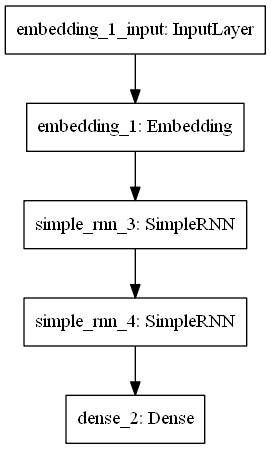

In [7]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='rnn_layer.png')


### Dataset para entrenar la red y visualizar la red con tensorboard

In [15]:
%load_ext tensorboard

### Manual RNN, para comprobar el funcionamiento de la SimpleRNN a la hora de realizar una predicción para cierta mueetra (en este caso, de 3 timestamps)

In [19]:
x_seq = tf.convert_to_tensor([[1.0]*5, [2.0]*5, [3.0]*5], dtype=tf.float32)
x_seq

<tf.Tensor: id=1098, shape=(3, 5), dtype=float32, numpy=
array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.]], dtype=float32)>

In [20]:
# single sequence of 3 timesteps with 5 attributes
tf.reshape(x_seq, shape=(1, 3, 5))

<tf.Tensor: id=1100, shape=(1, 3, 5), dtype=float32, numpy=
array([[[1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3.]]], dtype=float32)>

In [22]:
# output of SimepleRNN:
output = rnn_layer(tf.reshape(x_seq, shape=(1, 3, 5)))
output

<tf.Tensor: id=1256, shape=(1, 3, 2), dtype=float32, numpy=
array([[[0.39240566, 0.74433106],
        [0.80116504, 0.9912947 ],
        [0.95468265, 0.9993069 ]]], dtype=float32)>

### Probamos manualmente, con unos pesos aleatorios (generados con SImpleRNN), el proceso de predicción, sin entrenamiento:

In [28]:
# manually computing the output:
out_man = []
for t in range(len(x_seq)):
    xt = tf.reshape(x_seq[t], (1, 5))
    print('Time step {} =>'.format(t))
    print(' Input :', xt.numpy())
    
    ht = tf.matmul(xt, w_xh) + b_h #https://www.tensorflow.org/api_docs/python/tf/linalg/matmul
    print(' Hidden :', ht.numpy())
    
    # output-to-output recurrence:
    if t>0:
        prev_o = out_man[t-1]
    else:
        prev_o = tf.zeros(shape=(ht.shape))
    ot = ht + tf.matmul(prev_o, w_oo)
    ot = tf.math.tanh(ot)
    out_man.append(ot)
    print('Output (manual) :', ot.numpy())
    print('SimpleRNN output:'.format(t), output[0][t].numpy())
    print()

Time step 0 =>
 Input : [[1. 1. 1. 1. 1.]]
 Hidden : [[0.41464037 0.96012145]]
Output (manual) : [[0.39240566 0.74433106]]
SimpleRNN output: [0.39240566 0.74433106]

Time step 1 =>
 Input : [[2. 2. 2. 2. 2.]]
 Hidden : [[0.82928073 1.9202429 ]]
Output (manual) : [[0.80116504 0.9912947 ]]
SimpleRNN output: [0.80116504 0.9912947 ]

Time step 2 =>
 Input : [[3. 3. 3. 3. 3.]]
 Hidden : [[1.243921  2.8803642]]
Output (manual) : [[0.95468265 0.9993069 ]]
SimpleRNN output: [0.95468265 0.9993069 ]

